In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
count = 5
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        count += 1
        if count > 5:
            break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai import *
from fastai.vision.all import *

trn_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train'
files = get_image_files(trn_path)

(256, 256)


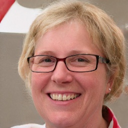

In [11]:
img = PILImage.create(files[20])
print(img.size)
img.to_thumb(128)

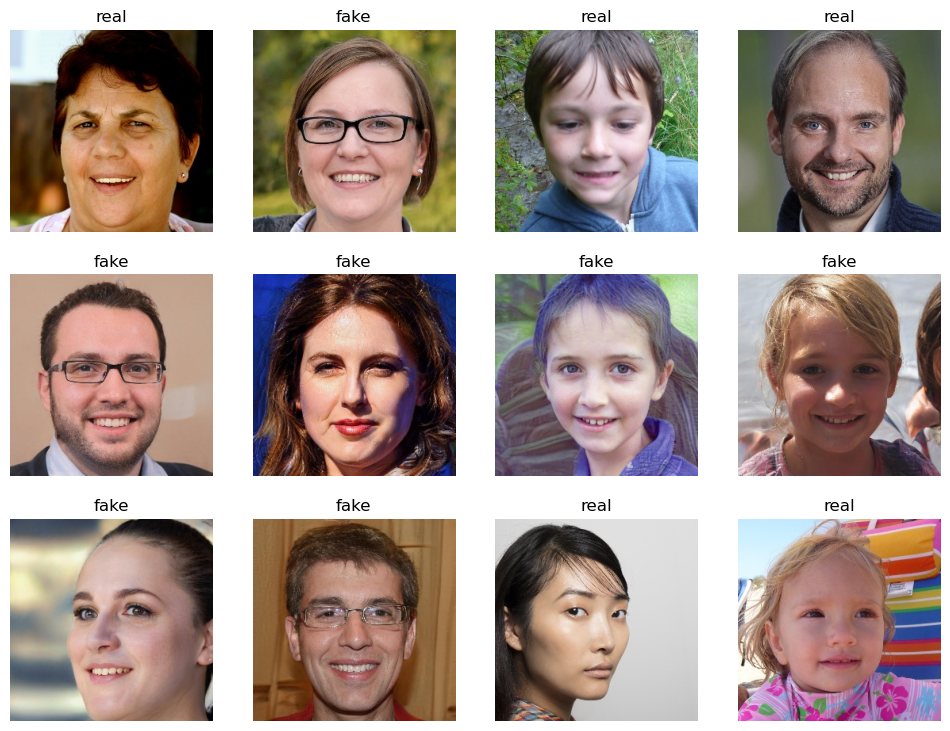

In [13]:
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, seed=42,
    item_tfms=None,
    batch_tfms=None)

dls.show_batch(max_n=12)

In [14]:
learn = vision_learner(dls, 'resnet26d', metrics=error_rate, path='.').to_fp16()

SuggestedLRs(valley=0.0014454397605732083, slide=0.009120108559727669)

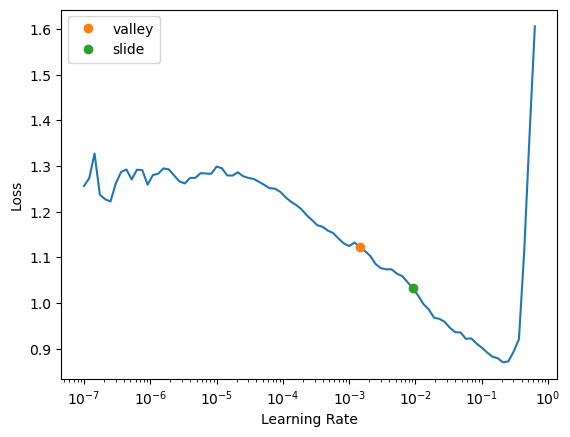

In [15]:
learn.lr_find(suggest_funcs=(valley, slide))

In [ ]:
learn.fine_tune(10, 0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.197398,0.139964,0.055400,07:23


epoch,train_loss,valid_loss,error_rate,time
0,0.097146,0.060918,0.022600,06:06
1,0.047897,0.033892,0.011900,06:04
2,0.029801,0.021900,0.008300,06:12
